# Bibliotecas

In [1]:
#========================={ BIBIOTECAS }==========================
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pathlib import Path
import os
import matplotlib.pyplot as plt

# Base

In [67]:
#========================={ BASES }==========================
base_diretório = Path(os.getcwd())
base_diretório = base_diretório.parent

base_bitcoin = base_diretório / 'Bases' / 'Bitcoin Historical Data.csv'
base_ethereum = base_diretório / 'Bases' / 'Ethereum Historical Data.csv'
base_bnb = base_diretório / 'Bases' / 'BNB Historical Data.csv'
base_solana = base_diretório / 'Bases' / 'Solana Historical Data.csv'

base_bitcoin = pd.read_csv(base_bitcoin)
base_ethereum = pd.read_csv(base_ethereum)
base_bnb = pd.read_csv(base_bnb)
base_solana = pd.read_csv(base_solana)


In [68]:
base_bitcoin

,Date,Price,Open,High,Low,Vol.,Change %
0,01/01/2017,995.4,963.4,"1,001.6",956.1,41.15K,3.33%
1,01/02/2017,"1,017.0",995.4,"1,031.7",990.2,64.95K,2.17%
2,01/03/2017,"1,033.3","1,017.0","1,035.5","1,006.5",54.79K,1.60%
3,01/04/2017,"1,135.4","1,033.3","1,148.5","1,022.3",156.27K,9.88%
4,01/05/2017,989.3,"1,135.4","1,150.6",874.5,240.01K,-12.86%
...,...,...,...,...,...,...,...
2795,08/27/2024,"59,450.9","62,832.2","63,201.4","58,187.3",108.53K,-5.40%
2796,08/28/2024,"59,016.0","59,425.6","60,198.4","57,912.1",109.47K,-0.73%
2797,08/29/2024,"59,373.5","59,027.3","61,150.6","58,807.1",87.19K,0.61%
2798,08/30/2024,"59,119.7","59,371.7","59,817.6","57,874.7",87.31K,-0.43%


In [69]:
#======================{ TRATAR BASES }=======================

# Converter a coluna "Date" de cada base para o formato de data
for df in [base_bitcoin, base_ethereum, base_bnb, base_solana]:
    df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Mudar o tipo das colunas, nas quais o conteúdo é dinheiro, para float e remover ',' dos valores
colunas_dinheiro = ['Price', 'Open', 'High', 'Low']
for df in [base_bitcoin, base_ethereum, base_bnb, base_solana]:
    for coluna in colunas_dinheiro:
        if df[coluna].dtype == 'object':  
            df[coluna] = pd.to_numeric(df[coluna].str.replace(',', ''))

# Remover '%' dos valores e mudar o tipo na coluna 'Change %' 
for df in [base_bitcoin, base_ethereum, base_bnb, base_solana]:
    if df['Change %'].dtype == 'object':  
        df['Change %'] = pd.to_numeric(df['Change %'].str.replace('%', ''))

def converter_vol_para_numero(valor):
    if isinstance(valor, str):  # Verifica se o valor é uma string
        if 'K' in valor:
            return float(valor.replace('K', '').replace(',', '')) * 1000
        elif 'M' in valor:
            return float(valor.replace('M', '').replace(',', '')) * 1000000
        elif 'B' in valor:
            return float(valor.replace('B', '').replace(',', '')) * 1000000000
        else:
            return float(valor.replace(',', ''))
    else:
        return valor  # Retorna o valor diretamente se já for numérico


for df in [base_bitcoin, base_ethereum, base_bnb, base_solana]:
    df['Vol.'] = df['Vol.'].apply(converter_vol_para_numero)

ano_inicio = 2023
# Filtro para determinar o período em que vamos puxar os dados da base
# base_bitcoin = base_bitcoin[base_bitcoin['Date'].dt.year >= ano_inicio]
# base_ethereum = base_ethereum[base_ethereum['Date'].dt.year >= ano_inicio]
# base_bnb = base_bnb[base_bnb['Date'].dt.year >= ano_inicio]
# base_solana = base_solana[base_solana['Date'].dt.year >= ano_inicio]


In [70]:
base_bitcoin

,Date,Price,Open,High,Low,Vol.,Change %
0,2017-01-01,995.4,963.4,1001.6,956.1,41150.0,3.33
1,2017-01-02,1017.0,995.4,1031.7,990.2,64950.0,2.17
2,2017-01-03,1033.3,1017.0,1035.5,1006.5,54790.0,1.60
3,2017-01-04,1135.4,1033.3,1148.5,1022.3,156270.0,9.88
4,2017-01-05,989.3,1135.4,1150.6,874.5,240010.0,-12.86
...,...,...,...,...,...,...,...
2795,2024-08-27,59450.9,62832.2,63201.4,58187.3,108530.0,-5.40
2796,2024-08-28,59016.0,59425.6,60198.4,57912.1,109470.0,-0.73
2797,2024-08-29,59373.5,59027.3,61150.6,58807.1,87190.0,0.61
2798,2024-08-30,59119.7,59371.7,59817.6,57874.7,87310.0,-0.43


# Algoritmo

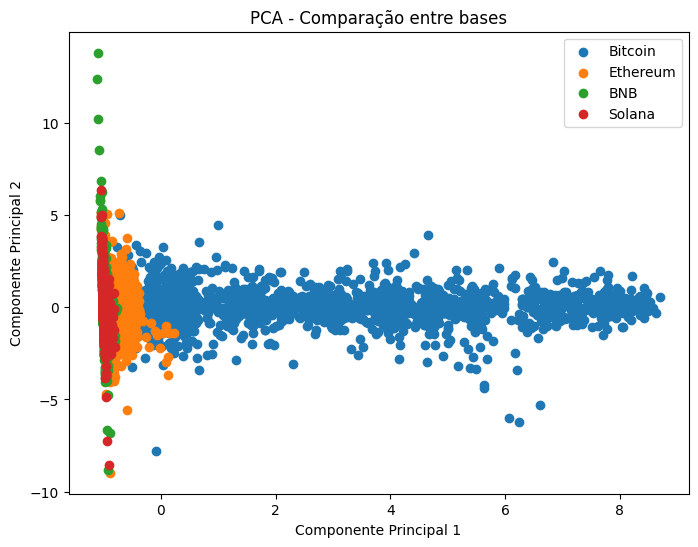

: 

In [71]:
# Criar coluna para identificar de qual base o dado é
base_bitcoin['Base'] = 'Bitcoin'
base_ethereum['Base'] = 'Ethereum'
base_bnb['Base'] = 'BNB'
base_solana['Base'] = 'Solana'

colunas_pca = ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']

# Concatenar os DataFrames
dados_concatenados = pd.concat([base_bitcoin, base_ethereum, base_bnb, base_solana], ignore_index=True)

dados_concatenados = dados_concatenados.dropna(subset=colunas_pca)

scaler = StandardScaler()
dados_padronizados = scaler.fit_transform(dados_concatenados[colunas_pca])

pca = PCA(n_components=2)  # reduzir para 2 componentes principais
componentes_principais = pca.fit_transform(dados_padronizados)

# Criar um DataFrame com os componentes principais
df_componentes = pd.DataFrame(data=componentes_principais, columns=['PC1', 'PC2'])
df_componentes['Base'] = dados_concatenados['Base'].values

plt.figure(figsize=(8, 6))
for base in df_componentes['Base'].unique():
    indices = df_componentes['Base'] == base
    plt.scatter(df_componentes.loc[indices, 'PC1'], df_componentes.loc[indices, 'PC2'], label=base)

plt.title('PCA - Comparação entre bases')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

